In [1]:
from IPython.display import HTML

HTML("""
<style>
/* Hide code cells by default */
div.input, div.jp-InputArea {
    display: none;
}
</style>

<button id="toggleCode" style="
    background:#0A4A7A;
    color:white;
    border:none;
    padding:8px 14px;
    font-size:14px;
    border-radius:6px;
    cursor:pointer;
    margin-bottom:12px;
">
Show / Hide Code
</button>

<script>
let visible = false;
document.getElementById("toggleCode").onclick = function () {
    visible = !visible;
    document.querySelectorAll('div.input, div.jp-InputArea').forEach(el => {
        el.style.display = visible ? 'block' : 'none';
    });
};
</script>
""")


 # <span style="color:#9467bd"><b>📊 BUSINESS DATA CASE </b></span>


In [2]:
######## PACKAGE INSTALATION  #######
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## <span style="color:#1f77b4"><b>STEP 1: Customers’ insights discovery</b></span>


### <span style="color:#1f77b4"><b>Retailer Dataset: Data Cleaning and Descriptive Statistics </b></span> 

In [3]:
df_retailer = pd.read_csv('data/retailer.csv')
df_retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866049 entries, 0 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    object 
 1   timestamp_utc  object 
 2   event_name     object 
 3   brand          object 
 4   product_name   object 
 5   sales          float64
 6   quantity       float64
dtypes: float64(2), object(5)
memory usage: 526.9+ MB


The dataset contains **7 variables** and **9,866,049 rows (events)**.  
The variable `timestamp_utc` is stored as an object (string).  
Therefore, it needs to be converted into a proper **date/datetime variable** to enable time-based analysis.


In [4]:
df_retailer.head(10)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN
3,reTjziox2cSrxVq70Y,2024-02-28 04:30:42,Product Page View,Science Diet,SD Fel Adt HBC OFEnt 24x5.5oz cs,NaN,NaN
4,reOrpt9vhSwhbPVtni,2024-06-01 22:22:30,Product Page View,NaN,NaN,NaN,NaN
5,reOrpt9vhSwhbPVtni,2024-06-01 22:36:26,Product Page View,Science Diet,SD Ca Adt Lt Ckn 30lb bg,NaN,NaN
6,reOrpt9vhSwhbPVtni,2024-06-01 22:43:07,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
7,reOrpt9vhSwhbPVtni,2024-06-20 14:02:48,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
8,reOrpt9vhSwhbPVtni,2024-06-06 10:38:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0
9,reOrpt9vhSwhbPVtni,2024-06-01 22:47:09,Add to cart,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN


In [5]:
col1 = ['event_name', 'brand']

for c in col1:
    print(f"\n=== {c} ===")
    print(df_retailer[c].unique())


=== event_name ===


['Product Page View' 'Order' 'Add to cart']

=== brand ===
[nan 'Science Diet' 'Hills' 'Prescription Diet']


In [6]:
summary_stats = (
    df_retailer
    .describe()
    .T
    .assign(missing=df_retailer.isna().sum())
)

summary_stats


,count,mean,std,min,25%,50%,75%,max,missing
sales,1439311.0,43.373495,27.617822,0.0,22.48,41.87,55.99,1184.7,8426738
quantity,1439311.0,1.081074,0.403381,0.0,1.00,1.00,1.00,30.0,8426738


In [7]:
categorical_summary = df_retailer.select_dtypes(include='object').describe().T
categorical_summary

,count,unique,top,freq
customer_id,9866049,1354584,unknown,194530
timestamp_utc,9866049,6920394,2024-01-12 16:18:17,10
event_name,9866049,3,Product Page View,6376627
brand,9588809,3,Science Diet,7858536
product_name,9588809,505,SD Ca Adt SmPws Ckn 4.5lb bg,221043


#### <span style="color:#a51c30"><b>How should we handle `unknown` customer_id values?</b></span>


In [8]:
df_freq_clients = df_retailer['customer_id'].value_counts().reset_index()
df_freq_clients.columns = ['customer_id', 'frequency']
df_freq_clients

,customer_id,frequency
0,unknown,194530
1,reth7mdoDJCbkDalaK,6190
2,reJZhNiD0cXQyewGn3,5658
3,reHQRAI2c9b35Tij3O,2230
4,rejr2YF7XyHh2RavMT,2081
...,...,...
1354579,re4j5Kk86B1uunxSLJ,1
1354580,reJRLE6SzA8kzVVG4S,1
1354581,rerWAZSpigQx5UnZMZ,1
1354582,reBda2QsASNpnCCjNY,1


The value **`unknown`** appears as a specific customer identifier and aggregates a large number of events.  
These observations correspond to interactions and purchases for which **no individual customer ID is available**.

For analyses that do **not rely on customer-level identification**—such as overall event distributions, brand performance, or funnel-level statistics—these observations are **kept**, as they still contribute valid behavioral information.

However, for analyses that explicitly depend on customer identity—including **average basket size**, **average purchase value**, **purchase frequency**, **customer segmentation**, or **joins with other customer-level tables**—the observations associated with `unknown` are **excluded** to avoid bias and ensure consistency.


#### <span style="color:#a51c30"><b>Should we keep rows where `brand` and `product_name` are NaN?</b></span>


In [9]:
df_to_check = df_retailer[
    df_retailer[['brand', 'product_name']].isna().all(axis=1)
]
df_to_check.shape

(277240, 7)

There are **277,240 rows** where both `brand` and `product_name` are missing.  
To decide whether these rows should be kept or removed, we check **whether any purchases occurred in these rows**.

If no purchase events (`Order`) are associated with these observations, they do not contribute to revenue or conversion analysis and can be safely removed.  
Otherwise, they would require further investigation.

In [10]:
df_sales_notna = df_to_check[df_retailer['sales'].notna()]
df_sales_notna.shape

C:\Users\nouts\AppData\Local\Temp\ipykernel_18484\539845987.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sales_notna = df_to_check[df_retailer['sales'].notna()]


(8776, 7)

In [11]:
df_sales_notna.head()

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
863,reczbO5sThS4rw0JdJ,2024-01-05 21:38:18,Order,NaN,NaN,78.99,1.0
885,reSFq86EE91VCfBImt,2024-03-15 03:35:17,Order,NaN,NaN,101.55,1.0
1575,reOseksZcmsUreRQbs,2024-03-15 02:40:17,Order,NaN,NaN,101.55,1.0
3608,re3Brfqpz42LjIx8Vc,2024-05-11 20:33:39,Order,NaN,NaN,96.99,1.0
5404,reLJUcuTVC8k9FQsNK,2024-04-14 03:19:34,Order,NaN,NaN,37.85,1.0


Among these rows, **more than 8,000 observations correspond to purchase events (`Order`)**.  
This indicates that some transactions occurred even when `brand` and `product_name` were missing.

In [12]:
# Filter for rows with NaN in brand, product_name, sales, AND event_name
df_check_all_nan = df_retailer[
    (df_retailer[['brand', 'product_name', 'sales']].isna().all(axis=1)) &
    (df_retailer['event_name'].isna())
]

df_check_all_nan.shape

(0, 7)

In the end, although no information is available on `brand` and `product_name`, we know that the individuals concerned **at least visited a product page**, and that **some of these observations correspond to actual purchases**.

Therefore, these rows still carry relevant behavioral and transactional information.  
For now, they are **kept in the dataset**, and this issue will be **revisited later** if more detailed product-level analysis is required.


#### <span style="color:#1f77b4"><b>Brands and Events distribution</b></span> 

In [13]:
# Convert the timestamp column to datetime format and extract the date component
df_retailer['timestamp_utc'] = pd.to_datetime(df_retailer['timestamp_utc'])
df_retailer['date'] = df_retailer['timestamp_utc'].dt.date

In [14]:
# Key descriptive statistics
infos = {
    "n_events": len(df_retailer),
    "n_customers": df_retailer["customer_id"].nunique(),
    "n_products": df_retailer["product_name"].nunique(),
    "n_brands": df_retailer["brand"].value_counts().to_dict(),
    "event_distribution": df_retailer["event_name"].value_counts().to_dict()
}

infos

{'n_events': 9866049,
 'n_customers': 1354584,
 'n_products': 505,
 'n_brands': {'Science Diet': 7858536,
  'Prescription Diet': 1247520,
  'Hills': 482753},
 'event_distribution': {'Product Page View': 6376627,
  'Add to cart': 2050111,
  'Order': 1439311}}

In [15]:
# Event distribution 
event_dist = pd.DataFrame({
    "event": list(infos["event_distribution"].keys()),
    "freq": list(infos["event_distribution"].values())
})

# Center text
center_text = (
    f"<b>{event_dist['freq'].sum()}</b><br>"
    "events"
)

# Donut chart
fig = px.pie(
    event_dist,
    names="event",
    values="freq",
    hole=0.7,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textinfo="percent+label")

fig.update_layout(
    title="Event Distribution",
    annotations=[dict(
        text=center_text,
        x=0.5,
        y=0.5,
        showarrow=False,
        font_size=14
    )],
    legend=dict(
        orientation="v",
        x=0.2,
        y=1.25
    ),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()


In [16]:
# Compute brand distribution (including NaN)
brand_dist = (
    df_retailer["brand"]
    .fillna("Missing")
    .value_counts(normalize=True)
    .reset_index()
)

brand_dist.columns = ["brand", "freq"]
brand_dist["freq_label"] = (brand_dist["freq"] * 100).round(1).astype(str) + "%"

# Center annotation
center_text = (
    f"<b>{df_retailer.shape[0]}</b><br>"
    "events<br>"
)

# Donut chart
fig = px.pie(
    brand_dist,
    names="brand",
    values="freq",
    hole=0.68,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textinfo="percent+label")

fig.update_layout(
    annotations=[dict(
        text=center_text,
        x=0.5,
        y=0.5,
        showarrow=False,
        font_size=13
    )],
    legend=dict(
        orientation="v",
        x=0.0,
        y=1.25
    ),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    margin=dict(t=80, b=40, l=40, r=40),
    title="Brand Distribution"
)

fig.show()
#


In [17]:
# Compute event distribution by brand
event_brand = (
    df_retailer
    .groupby(["brand", "event_name"])
    .size()
    .reset_index(name="freq")
)

# Replace missing brands if needed
event_brand["brand"] = event_brand["brand"].fillna("Missing")

# Donut charts on the same figure (one per brand)
fig = px.pie(
    event_brand,
    names="event_name",
    values="freq",
    hole=0.65,
    facet_col="brand",
    color="event_name",
    color_discrete_sequence=["#A74E4E", "#A22BF2", "#A1934F"]
)

fig.update_traces(textinfo="percent+label")

fig.update_layout(
    title="Event Distribution by Brand",
    legend=dict(
        orientation="h",
        x=0.0,
        y=1.15
    ),
    margin=dict(t=100, b=40, l=40, r=40)
)

fig.show()


In [18]:
# Compute brand distribution by event
brand_event = (
    df_retailer
    .groupby(["event_name", "brand"])
    .size()
    .reset_index(name="freq")
)

# Replace missing brands if needed
brand_event["brand"] = brand_event["brand"].fillna("Missing")

# Donut charts on the same figure (one per event)
fig = px.pie(
    brand_event,
    names="brand",
    values="freq",
    hole=0.65,
    facet_col="event_name",
    color="brand",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textinfo="percent")

fig.update_layout(
    title="Brand Distribution by Event",
    legend=dict(
        orientation="h",
        x=0.0,
        y=1.15
    ),
    margin=dict(t=100, b=40, l=40, r=40)
)

fig.show()


**Product Page View** events represent the largest share of all events, followed by **Add to cart** and **Order** events.  
**Science Diet** accounts for the majority of events across all event types, while **Prescription Diet** and **Hills** contribute smaller proportions.  

The distribution of brands is **consistent across event types**, with Science Diet remaining dominant at each stage of the funnel.  
When analyzing events by brand, **Hills shows a higher proportion of Order events** relative to its total volume, whereas **Prescription Diet exhibits a lower proportion of Orders**.  
**Science Diet** displays a higher share of Product Page View events compared to Order events.


#### <span style="color:#1f77b4"><b>Brand-Level Revenue and Sales Volume</b></span> 


C:\Users\nouts\AppData\Local\Temp\ipykernel_18484\466346630.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nouts\AppData\Local\Temp\ipykernel_18484\466346630.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




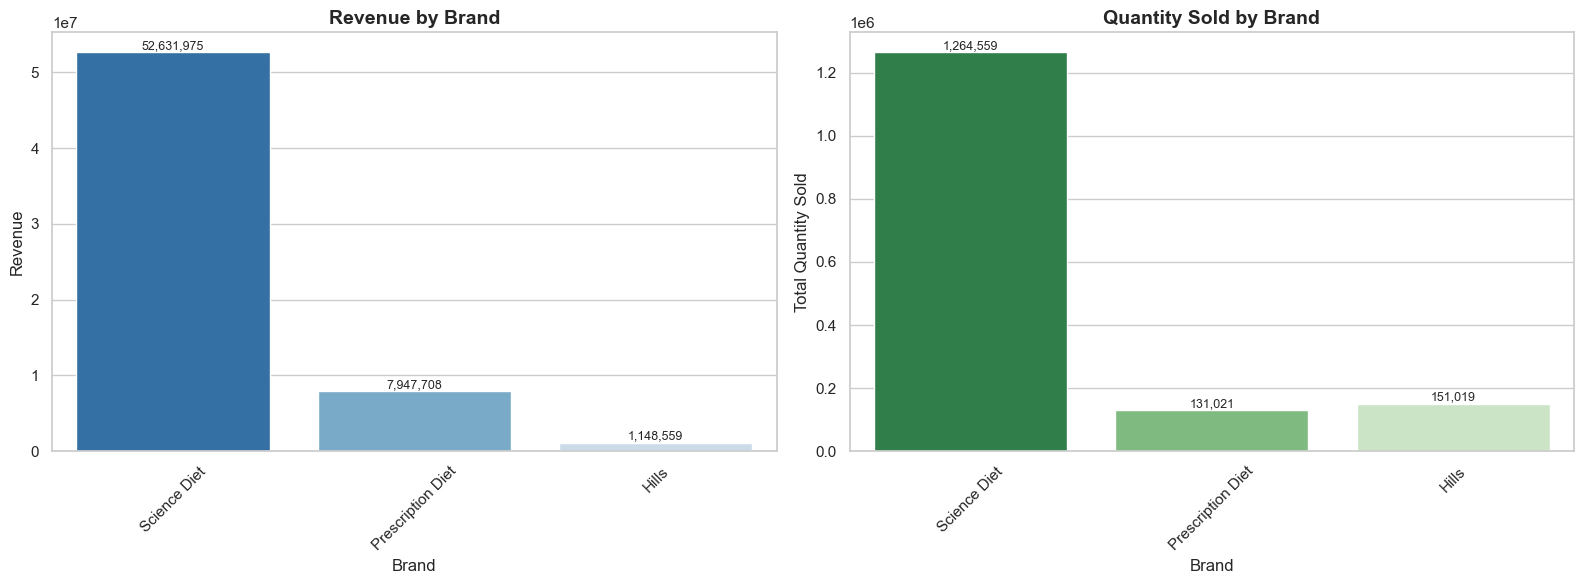

In [19]:
# Revenue and quantity sold by brand
sns.set_theme(style="whitegrid")

# Aggregate data
brand_metrics = (
    df_retailer
    .groupby('brand')
    .agg(
        revenue=('sales', 'sum'),
        quantity=('quantity', 'sum')
    )
    .reset_index()
    .sort_values('revenue', ascending=False)
)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharex=True)

# --- Revenue ---
sns.barplot(
    data=brand_metrics,
    x='brand',
    y='revenue',
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title("Revenue by Brand", fontsize=14, weight='bold')
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Revenue")
axes[0].tick_params(axis='x', rotation=45)

# Add labels
for i, v in enumerate(brand_metrics['revenue']):
    axes[0].text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

# --- Quantity ---
sns.barplot(
    data=brand_metrics,
    x='brand',
    y='quantity',
    palette='Greens_r',
    ax=axes[1]
)
axes[1].set_title("Quantity Sold by Brand", fontsize=14, weight='bold')
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Total Quantity Sold")
axes[1].tick_params(axis='x', rotation=45)

# Add labels
for i, v in enumerate(brand_metrics['quantity']):
    axes[1].text(i, v, f"{int(v):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Science Diet dominates both revenue and quantity sold. It generates approximately **52.6 million** in revenue and sells about **1.26 million units**, far exceeding the other brands. Prescription Diet records around **7.9 million** in revenue with approximately **131 thousand units sold**, while Hills shows the lowest revenue at about **1.15 million**, despite selling around **151 thousand units**, which is slightly higher than Prescription Diet in volume. This indicates that Prescription Diet generates higher revenue than Hills with fewer units sold, whereas Hills sells more units but generates less revenue.


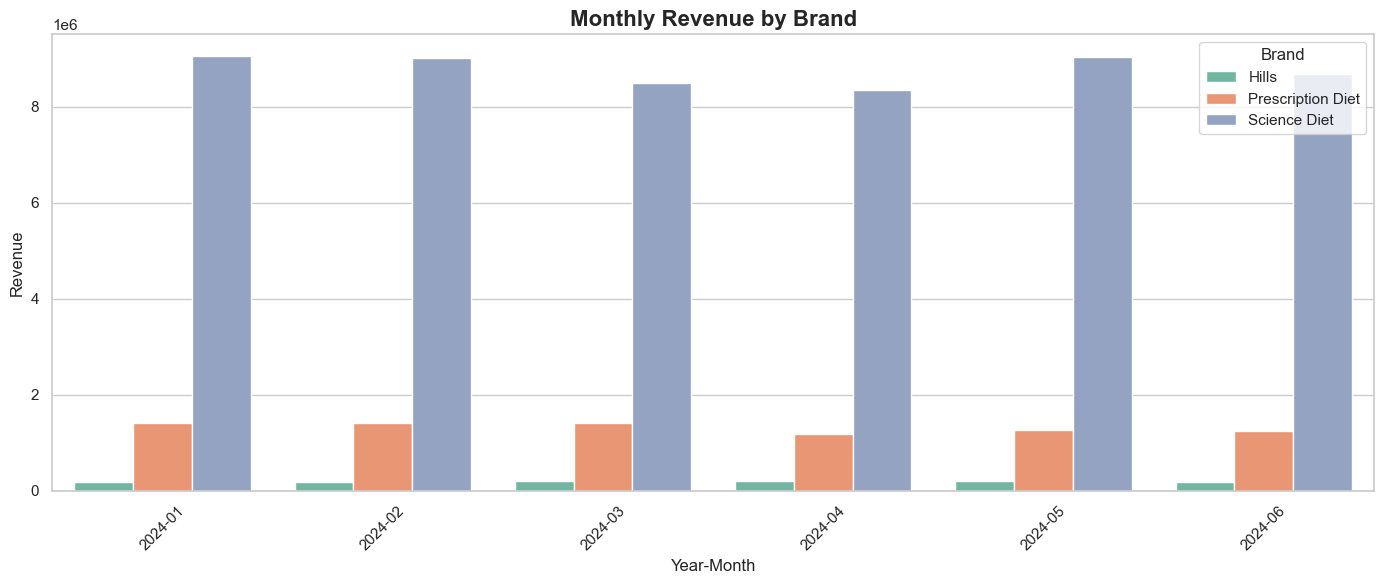

In [20]:
# Monthly revenue by brand
sns.set_theme(style="whitegrid")

# Ensure date column is datetime
df_retailer['date'] = pd.to_datetime(df_retailer['date'], errors='coerce')

# Keep only valid sales
df_sales = df_retailer[df_retailer['sales'].notna()].copy()

# Create year-month column
df_sales['year_month'] = df_sales['date'].dt.to_period('M').astype(str)

# Monthly revenue per brand
monthly_revenue = (
    df_sales.groupby(['year_month', 'brand'])['sales']
    .sum()
    .reset_index()
)

# Grouped bar chart
plt.figure(figsize=(14,6))

sns.barplot(
    data=monthly_revenue,
    x='year_month',
    y='sales',
    hue='brand',
    palette='Set2'
)

plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Monthly Revenue by Brand", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.legend(title="Brand")
plt.tight_layout()
plt.show()


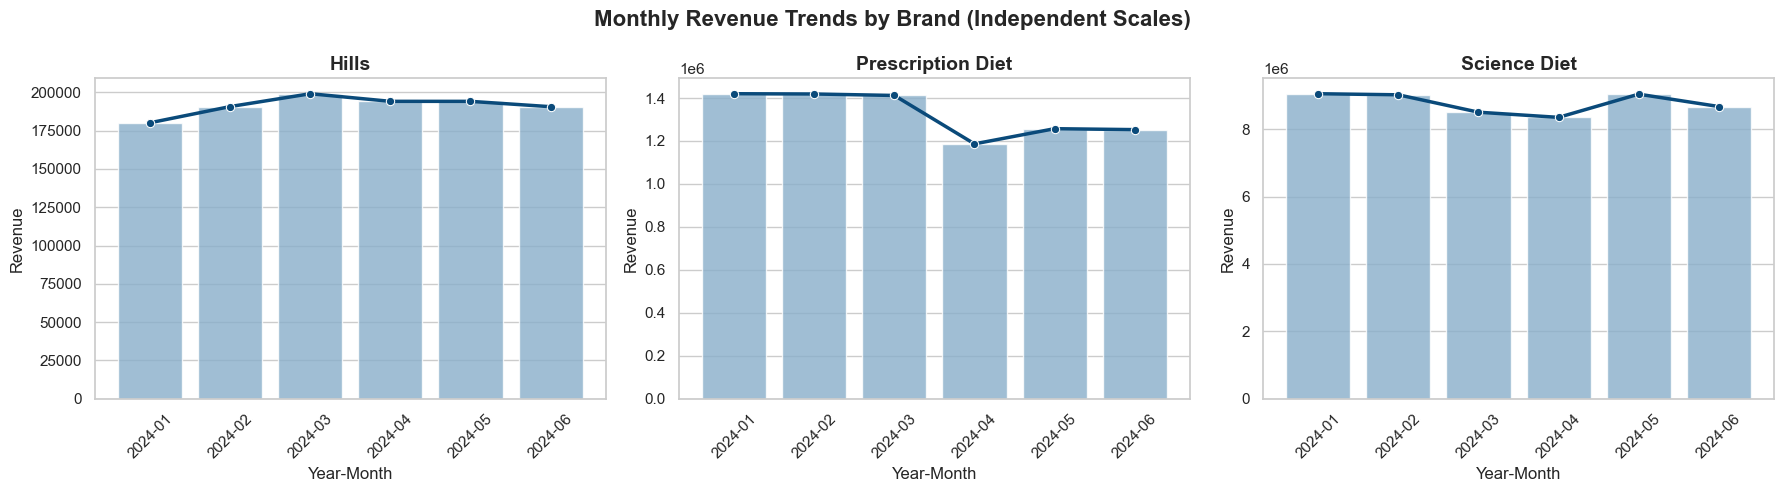

In [21]:
sns.set_theme(style="whitegrid")

# Ensure date column is datetime
df_retailer['date'] = pd.to_datetime(df_retailer['date'], errors='coerce')

# Keep only valid sales
df_sales = df_retailer[df_retailer['sales'].notna()].copy()

# Create year-month column
df_sales['year_month'] = df_sales['date'].dt.to_period('M').astype(str)

# Monthly revenue per brand
monthly_revenue = (
    df_sales.groupby(['year_month', 'brand'])['sales']
    .sum()
    .reset_index()
)

# Brands
brands = monthly_revenue['brand'].unique()

# Side-by-side subplots with independent y-scales
fig, axes = plt.subplots(1, len(brands), figsize=(6 * len(brands), 5), sharey=False)

# Handle single brand case
if len(brands) == 1:
    axes = [axes]

# Plot each brand separately
for ax, b in zip(axes, brands):
    brand_data = monthly_revenue[monthly_revenue['brand'] == b]

    # Barplot
    sns.barplot(
        data=brand_data,
        x='year_month',
        y='sales',
        color="#7EB0D5",
        alpha=0.8,
        ax=ax
    )

    # Lineplot
    sns.lineplot(
        data=brand_data,
        x='year_month',
        y='sales',
        color="#0A4A7A",
        marker='o',
        linewidth=2.5,
        ax=ax
    )

    ax.set_title(b, fontsize=14, weight="bold")
    ax.set_xlabel("Year-Month")
    ax.set_ylabel("Revenue")
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Monthly Revenue Trends by Brand (Independent Scales)", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


Science Diet has the highest monthly revenue, followed by Prescription Diet, while Hills remains at a much lower level. Using independent scales highlights brand-specific trends: Hills slightly increases then stabilizes, Prescription Diet declines around March–April before partially recovering, and Science Diet shows moderate variability with a rebound in May.


In [22]:
# Pivot table by brand instead of product_name
brand_stats = df_retailer.pivot_table(
    index='brand',
    columns='event_name',
    values='customer_id',
    aggfunc='count'
)

# Replace NaN with zeros
brand_stats = brand_stats.fillna(0)

# Funnel metrics
brand_stats['cart_rate'] = brand_stats['Add to cart'] / brand_stats['Product Page View']
brand_stats['order_rate'] = brand_stats['Order'] / brand_stats['Product Page View']
brand_stats['conversion_cart_to_order'] = brand_stats['Order'] / brand_stats['Add to cart']

# Top 20 brands by order rate
brand_stats.sort_values('order_rate', ascending=False)


event_name,Add to cart,Order,Product Page View,cart_rate,order_rate,conversion_cart_to_order
brand,,,,,,
Hills,137429,112298,233026,0.589758,0.481912,0.817135
Science Diet,1652119,1201422,5004995,0.330094,0.240045,0.727201
Prescription Diet,236211,116815,894494,0.264072,0.130593,0.494537


Hills shows the highest cart, order, and cart-to-order conversion rates.  
Science Diet generates the largest volumes but lower conversion rates.  
Prescription Diet records the lowest performance across all funnel stages.

#### <span style="color:#1f77b4"><b> Frequency Analysis</b></span> 

This section analyzes customer activity through event frequencies.  
First, we examine the **frequency of events at the customer level**, then extend the analysis **by brand**.  
Finally, we study the **distribution of customers according to their interaction and purchase frequencies**.


In [23]:
# Clean dataset by removing rows with 'unknown' customer_id
df_retailer = df_retailer[df_retailer['customer_id'] != 'unknown']

In [24]:
# Compute the total number of events per customer
customer_event_freq = (
    df_retailer
    .groupby('customer_id')
    .size()
    .reset_index(name='n_events')
)
customer_event_freq.head()

,customer_id,n_events
0,re0007V8sqIHsZnbvC,2
1,re000JYhnKbTkPqMB4,3
2,re000fIO9QXTWYjOfn,23
3,re000kbtVVzPwZcEr4,19
4,re000pHbVOysCXRHgt,17


In [25]:
# Compute the number of purchase events (Order) per customer
customer_order_freq = (
    df_retailer[df_retailer['event_name'] == 'Order']
    .groupby('customer_id')
    .size()
    .reset_index(name='n_orders')
)
customer_order_freq.head()

,customer_id,n_orders
0,re000fIO9QXTWYjOfn,8
1,re000pHbVOysCXRHgt,5
2,re002BI64EJvXZLhyr,3
3,re002SPjzXcRe2XY9F,2
4,re002l1aOJG3OoCTK8,3


In [26]:
# Merge total events and purchase counts at the customer level
customer_freq = customer_event_freq.merge(
    customer_order_freq,
    on='customer_id',
    how='left'
)

customer_freq['n_orders'] = customer_freq['n_orders'].fillna(0).astype(int)
customer_freq.head()

,customer_id,n_events,n_orders
0,re0007V8sqIHsZnbvC,2,0
1,re000JYhnKbTkPqMB4,3,0
2,re000fIO9QXTWYjOfn,23,8
3,re000kbtVVzPwZcEr4,19,0
4,re000pHbVOysCXRHgt,17,5


In [27]:
# Nicely formatted summary statistics table
summary_table = (
    customer_freq[['n_events', 'n_orders']]
    .describe()
    .round(2)
    .style
    .format("{:,.2f}")
    .set_caption("Customer-Level Frequency Summary Statistics")
)

summary_table

,n_events,n_orders
count,"1,354,583.00","1,354,583.00"
mean,7.14,1.04
std,13.94,3.03
min,1.00,0.00
25%,1.00,0.00
50%,3.00,0.00
75%,8.00,1.00
max,"6,190.00","2,013.00"


The table shows how active customers are in terms of events and purchases.  
Half of the customers generated **3 events or fewer** and **did not place any order**.  
About **75% of customers** recorded **at most 8 events** and **no more than one purchase**.  
A small number of customers are very active, which explains the large difference between typical values and the maximum values.


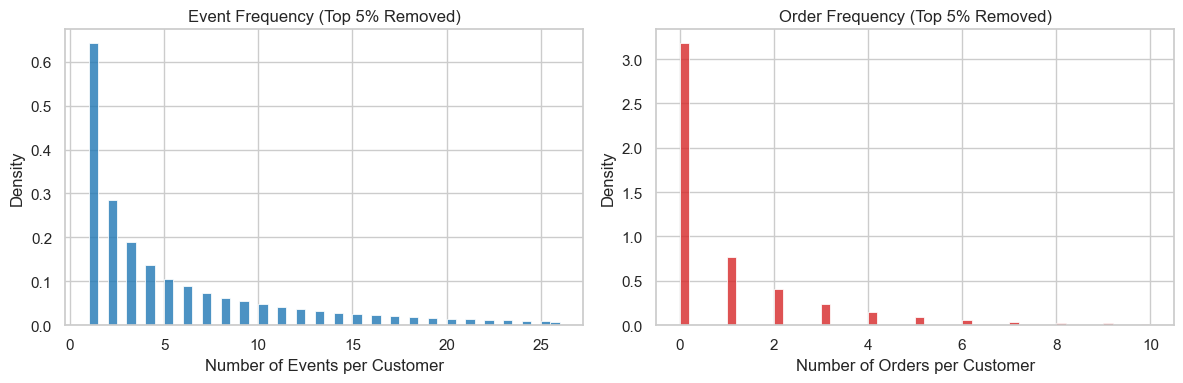

In [28]:
# Distribution of Customer Event and Order Frequencies (Top 5% Removed)

sns.set_theme(style="whitegrid")

# Compute 95th percentiles
p95_events = customer_freq['n_events'].quantile(0.95)
p95_orders = customer_freq['n_orders'].quantile(0.99)

# Truncate top 5%
events_95 = customer_freq[customer_freq['n_events'] <= p95_events]
orders_95 = customer_freq[customer_freq['n_orders'] <= p95_orders]

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# --- Event frequency ---
sns.histplot(
    events_95['n_events'],
    bins=50,
    stat="density",
    color="#1f77b4",
    edgecolor="white",
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("Event Frequency (Top 5% Removed)")
axes[0].set_xlabel("Number of Events per Customer")
axes[0].set_ylabel("Density")

# --- Order frequency ---
sns.histplot(
    orders_95['n_orders'],
    bins=50,
    stat="density",
    color="#d62728",
    edgecolor="white",
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Order Frequency (Top 5% Removed)")
axes[1].set_xlabel("Number of Orders per Customer")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


The distributions show that customer activity is highly concentrated.  
Most customers generate a small number of events, while a limited fraction accounts for higher activity levels.  
Similarly, the order distribution indicates that the majority of customers place few or no orders, with purchase activity concentrated among a small group of clients.  
Removing the top 5% of customers improves readability and highlights the behavior of the majority.

#### <span style="color:#1f77b4"><b> Clients Segmentation </b></span> 

In [31]:
# Revenue Contribution by Top Customers (1%, 5%, 10%, 20%)
# Total revenue over the period
df_rfm = (
    df_retailer[df_retailer['event_name'] == 'Order']
    .groupby('customer_id')
    .agg(
        monetary=('sales', 'sum')
    )
    .reset_index()
)
total_revenue = df_sales['sales'].sum()

# Percentiles to analyze
percentiles = [0.01, 0.05, 0.10, 0.20]

# Compute revenue contribution for each percentile
results = []

for p in percentiles:
    top_clients = df_rfm.nlargest(int(len(df_rfm) * p), 'monetary')
    revenue_top = top_clients['monetary'].sum()
    pct_revenue = (revenue_top / total_revenue) * 100

    results.append({
        "Top % Clients": f"{int(p*100)}%",
        "Revenue from Top Clients": revenue_top,
        "Share of Total Revenue (%)": pct_revenue
    })

# Convert to DataFrame
revenue_contribution = pd.DataFrame(results)

revenue_contribution


,Top % Clients,Revenue from Top Clients,Share of Total Revenue (%)
0,1%,5174146.03,8.288188
1,5%,14902402.73,23.871364
2,10%,22720377.85,36.394561
3,20%,33388918.66,53.483927


##### RFM Analysis
This section applies the RFM methodology to characterize customers based on their recency, frequency, and monetary value.

In [33]:
# Prepare transactional data for RFM analysis (keep only purchase events)
df_rfm_base = (
    df_retailer[df_retailer['event_name'] == 'Order']
    .copy()
)

In [34]:
# Define reference date (last date in the dataset)
reference_date = df_rfm_base['date'].max() + pd.Timedelta(days=1)

In [35]:
# Compute RFM metrics at customer level
df_rfm = (
    df_rfm_base
    .groupby('customer_id')
    .agg(
        recency=('date', lambda x: (reference_date - x.max()).days),
        frequency=('date', 'count'),
        monetary=('sales', 'sum')
    )
    .reset_index()
)

df_rfm.head()

,customer_id,recency,frequency,monetary
0,re000fIO9QXTWYjOfn,10,8,284.52
1,re000pHbVOysCXRHgt,23,5,394.94
2,re002BI64EJvXZLhyr,6,3,351.54
3,re002SPjzXcRe2XY9F,93,2,65.97
4,re002l1aOJG3OoCTK8,52,3,83.96


In [37]:
df_rfm['R_score'] = pd.qcut(
    df_rfm['recency'].rank(method='first'),
    5,
    labels=[5, 4, 3, 2, 1]
).astype(int)

df_rfm['F_score'] = pd.qcut(
    df_rfm['frequency'].rank(method='first'),
    5,
    labels=[1, 2, 3, 4, 5]
).astype(int)

df_rfm['M_score'] = pd.qcut(
    df_rfm['monetary'].rank(method='first'),
    5,
    labels=[1, 2, 3, 4, 5]
).astype(int)


In [38]:
# Compute overall RFM score
df_rfm['RFM_score'] = (
    df_rfm['R_score'].astype(str) +
    df_rfm['F_score'].astype(str) +
    df_rfm['M_score'].astype(str)
)

df_rfm.head()

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
0,re000fIO9QXTWYjOfn,10,8,284.52,5,5,5,555
1,re000pHbVOysCXRHgt,23,5,394.94,4,5,5,455
2,re002BI64EJvXZLhyr,6,3,351.54,5,4,5,545
3,re002SPjzXcRe2XY9F,93,2,65.97,2,3,3,233
4,re002l1aOJG3OoCTK8,52,3,83.96,3,4,3,343


In [39]:
# Optional: Create simple RFM segments
df_rfm['segment'] = 'Other'

df_rfm.loc[df_rfm['RFM_score'].isin(['555','554','545','544','455']), 'segment'] = 'Champions'
df_rfm.loc[df_rfm['RFM_score'].isin(['543','444','435','434','355']), 'segment'] = 'Loyal Customers'
df_rfm.loc[df_rfm['RFM_score'].isin(['533','532','531','522']), 'segment'] = 'Potential Loyalists'
df_rfm.loc[df_rfm['RFM_score'].isin(['311','312','221']), 'segment'] = 'At Risk'
df_rfm.loc[df_rfm['RFM_score'].isin(['111','112','121']), 'segment'] = 'Lost'

df_rfm['segment'].value_counts()

segment
Other                  310547
Champions               77434
Lost                    44274
Loyal Customers         34096
At Risk                 23474
Potential Loyalists     12200
Name: count, dtype: int64

In [40]:
# Summary statistics by RFM segment
rfm_segment_summary = (
    df_rfm
    .groupby('segment')
    .agg(
        n_customers=('customer_id', 'count'),
        avg_recency=('recency', 'mean'),
        avg_frequency=('frequency', 'mean'),
        avg_monetary=('monetary', 'mean')
    )
    .round(2)
)

rfm_segment_summary


,n_customers,avg_recency,avg_frequency,avg_monetary
segment,,,,
At Risk,23474,74.07,1.00,27.61
Champions,77434,12.54,7.03,322.16
Lost,44274,154.86,1.00,28.34
Loyal Customers,34096,30.99,3.88,182.71
Other,310547,74.99,2.08,88.33
Potential Loyalists,12200,8.30,1.75,55.95


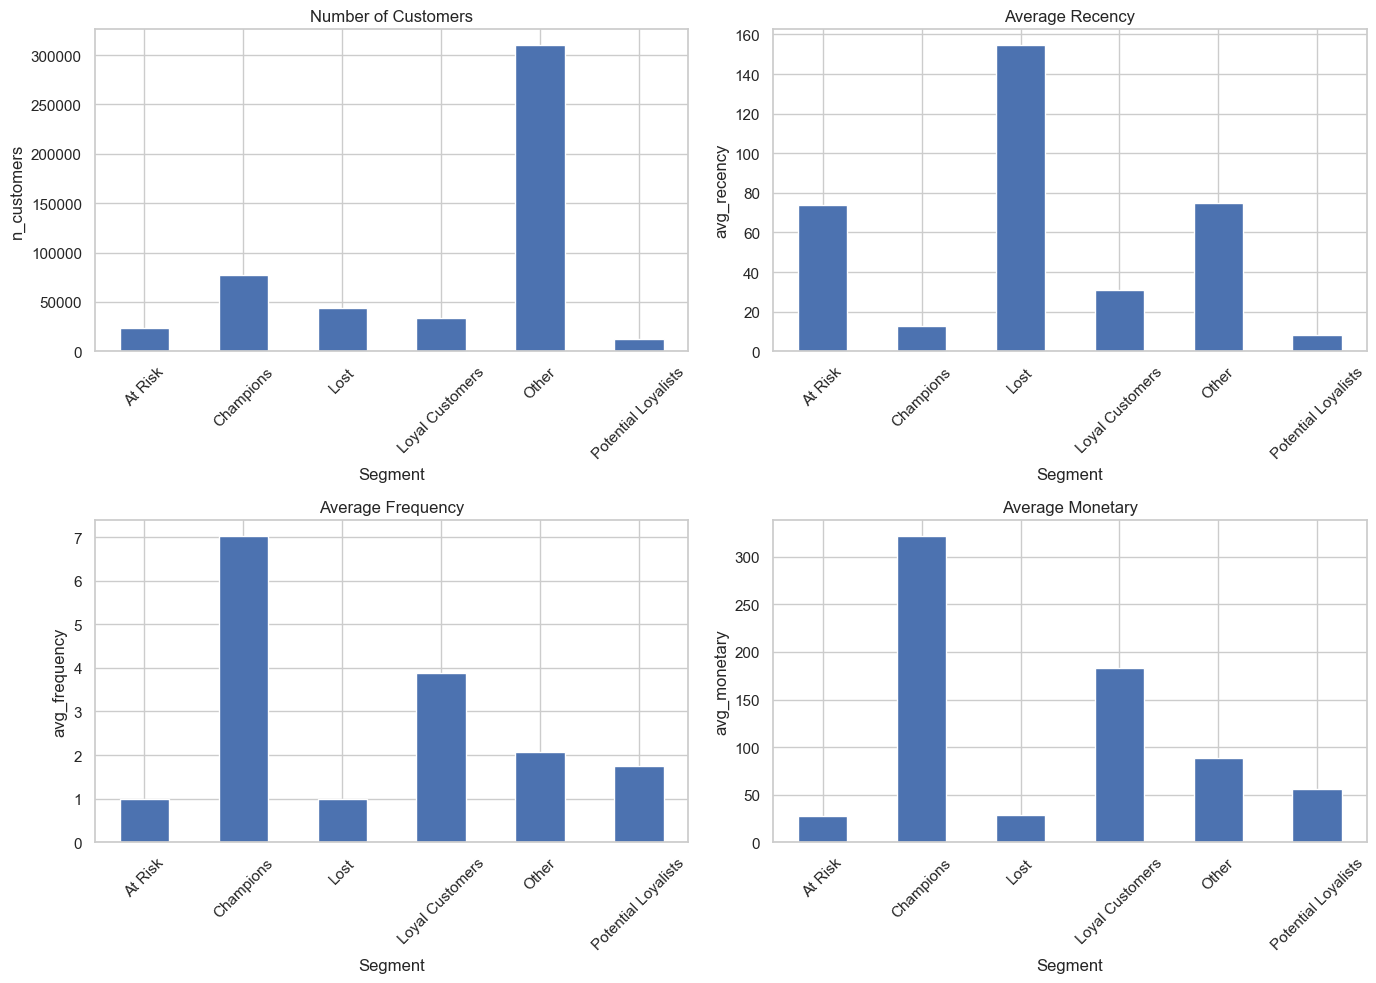

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

cols = [
    ('n_customers', 'Number of Customers'),
    ('avg_recency', 'Average Recency'),
    ('avg_frequency', 'Average Frequency'),
    ('avg_monetary', 'Average Monetary')
]

for ax, (col, title) in zip(axes, cols):
    rfm_segment_summary[col].plot(
        kind='bar',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Segment')
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### <span style="color:#1f77b4"><b>Socio_demo Dataset: Data Cleaning and Descriptive Statistics </b></span> 

In [ ]:
df_socio = pd.read_csv('data/socio_demo.csv')
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354584 entries, 0 to 1354583
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1354584 non-null  object
 1   breed        1354584 non-null  object
 2   age          1354584 non-null  object
 3   income       1354584 non-null  object
dtypes: object(4)
memory usage: 41.3+ MB


In [ ]:
df_socio.head()

,customer_id,breed,age,income
0,rezLh5Hae3m6flaxM4,Purebred,[25-35[,[120-200K$[
1,resWkHpEcL1IUfdoBp,Purebred,[25-35[,[80-120K$[
2,re9qxF7kS9R2LwOVVY,Purebred,[35-45[,[80-120K$[
3,re3IZNYZY6xr8OAE56,Purebred,[55-65[,[40-80K$[
4,re01lnV2DfgMLdfIF7,Purebred,[65+[,[80-120K$[


In [ ]:
for col in df_socio.columns:
    print(f"\n📌 Unique values in '{col}':")
    print(df_socio[col].unique())


📌 Unique values in 'customer_id':
['rezLh5Hae3m6flaxM4' 'resWkHpEcL1IUfdoBp' 're9qxF7kS9R2LwOVVY' ...
 'reHJlTYbsdyhpQPXzg' 're0dRkGLDObofTjJNj' 'reAwDA5MSjXhPteWq2']

📌 Unique values in 'breed':
['Purebred' 'Mixed-breed']

📌 Unique values in 'age':
['[25-35[' '[35-45[' '[55-65[' '[65+[' '[18-25[' '[45-55[']

📌 Unique values in 'income':
['[120-200K$[' '[80-120K$[' '[40-80K$[' '[200K$+[' '[0-40K$[']


C:\Users\nouts\AppData\Local\Temp\ipykernel_48532\2416246289.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nouts\AppData\Local\Temp\ipykernel_48532\2416246289.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nouts\AppData\Local\Temp\ipykernel_48532\2416246289.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




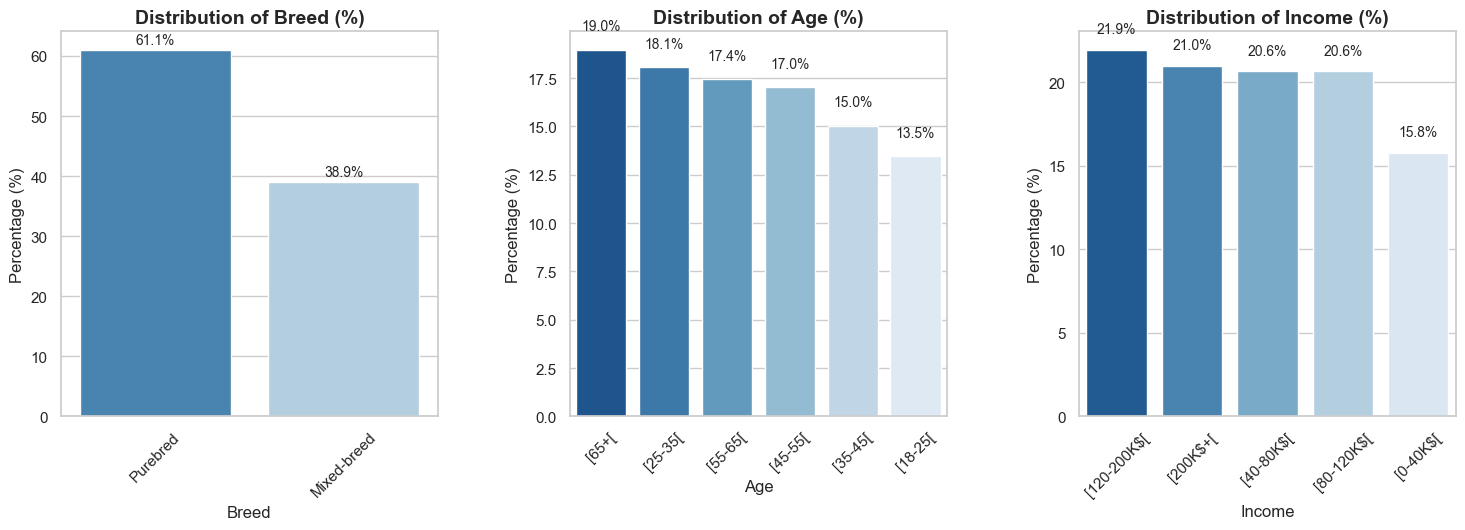

In [ ]:
sns.set_theme(style="whitegrid")

# Select all columns except customer_id
cols = [col for col in df_socio.columns if col != "customer_id"]

fig, axes = plt.subplots(1, len(cols), figsize=(6 * len(cols), 5))
plt.subplots_adjust(wspace=0.35)

if len(cols) == 1:
    axes = [axes]

for ax, col in zip(axes, cols):
    
    # Compute percentage distribution
    pct = (
        df_socio[col]
        .value_counts(normalize=True) * 100
    )
    
    # Plot barplot
    sns.barplot(
        x=pct.index,
        y=pct.values,
        palette="Blues_r",
        ax=ax
    )
    
    ax.set_title(f"Distribution of {col.capitalize()} (%)", fontsize=14, weight="bold")
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Add % labels above bars
    for i, v in enumerate(pct.values):
        ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()


The socio-demographic distributions show that **purebred owners are the majority**, accounting for around 60% of the sample. The **age profile is relatively balanced**, with a slight concentration among older customers (65+) and middle-age groups, while younger customers (18–25) are less represented. In terms of income, the distribution is fairly even across brackets, with a modest overrepresentation of higher-income households, indicating a customer base that is broadly diversified but slightly skewed toward higher purchasing power.


## <span style="color:#1f77b4"><b>STEP 2: Measuring media effectiveness </b></span>


### <span style="color:#1f77b4"><b>Programmatic Dataset: Data Cleaning and Descriptive Statistics </b></span> 

In [ ]:
df_programmatic = pd.read_csv('data/programmatic_publisher.csv')
df_programmatic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17493428 entries, 0 to 17493427
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   dsp_id           object 
 1   timestamp_utc    object 
 2   campaign_name    object 
 3   device_type      object 
 4   cost_milli_cent  float64
dtypes: float64(1), object(4)
memory usage: 667.3+ MB


In [ ]:
df_programmatic.head(10)

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
0,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,2024-02-06 04:10:41,Contextual,Phone,283.496
1,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,2024-02-26 23:49:23,Retargeting,PC,1884.537
2,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,2024-06-16 20:55:27,Contextual,TV,601.930
3,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-26 19:15:54,Contextual,TV,1191.750
4,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-05-31 18:38:54,Retargeting,TV,739.262
5,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-05 22:50:03,Retargeting,PC,153.500
6,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-09 21:06:22,Contextual,TV,5878.010
7,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-15 21:41:44,Contextual,TV,3073.631
8,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-16 20:47:06,Contextual,TV,3161.905
9,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-16 21:56:50,Contextual,TV,2582.035


In [ ]:
for col in df_programmatic.columns:
    print(f"\n📌 Unique values in '{col}':")
    print(df_programmatic[col].unique())


📌 Unique values in 'dsp_id':
['dsp9tnGII5BeXbn6LUSFZPcKGCyI0F' 'dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ'
 'dspcd3UcXUcUk0PEo2hb8CEH3WVlFE' ... 'dspbV1X6ia7x8IMxQQgHqasXsZvSev'
 'dsp4PJIYh8QWwR5FCxYcxPJzUOCuQo' 'dspeuhlwK7LBRgCX3sMsSMFIxLHkeD']

📌 Unique values in 'timestamp_utc':
['2024-02-06 04:10:41' '2024-02-26 23:49:23' '2024-06-16 20:55:27' ...
 '2024-04-21 10:54:56' '2024-03-07 21:07:25' '2024-06-19 00:04:31']

📌 Unique values in 'campaign_name':
['Contextual' 'Retargeting']

📌 Unique values in 'device_type':
['Phone' 'PC' 'TV' 'Unknown' 'Robot']

📌 Unique values in 'cost_milli_cent':
[ 283.496 1884.537  601.93  ... 2362.996 1902.544 1589.538]


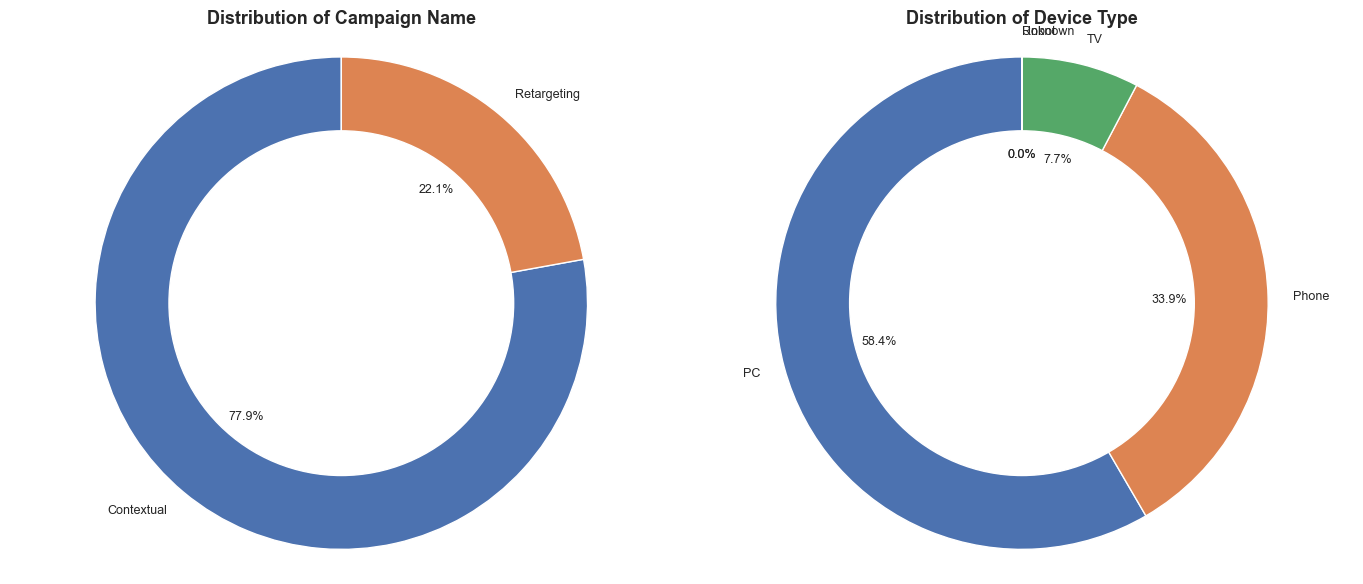

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ---------- Donut chart: Campaign Name ----------
campaign_counts = df_programmatic['campaign_name'].fillna('Missing').value_counts()

ax1.pie(
    campaign_counts,
    labels=campaign_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'}
)
ax1.add_artist(plt.Circle((0, 0), 0.70, color='white'))
ax1.set_title("Distribution of Campaign Name", fontsize=13, weight='bold')
ax1.axis('equal')

# ---------- Donut chart: Device Type ----------
device_counts = df_programmatic['device_type'].fillna('Missing').value_counts()

ax2.pie(
    device_counts,
    labels=device_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'}
)
ax2.add_artist(plt.Circle((0, 0), 0.70, color='white'))
ax2.set_title("Distribution of Device Type", fontsize=13, weight='bold')
ax2.axis('equal')

plt.tight_layout()
plt.show()


Unknow et Robot are rare in our Data base:

*** We can drop lines concerned

*** Or use it in the goal to catch some information about it

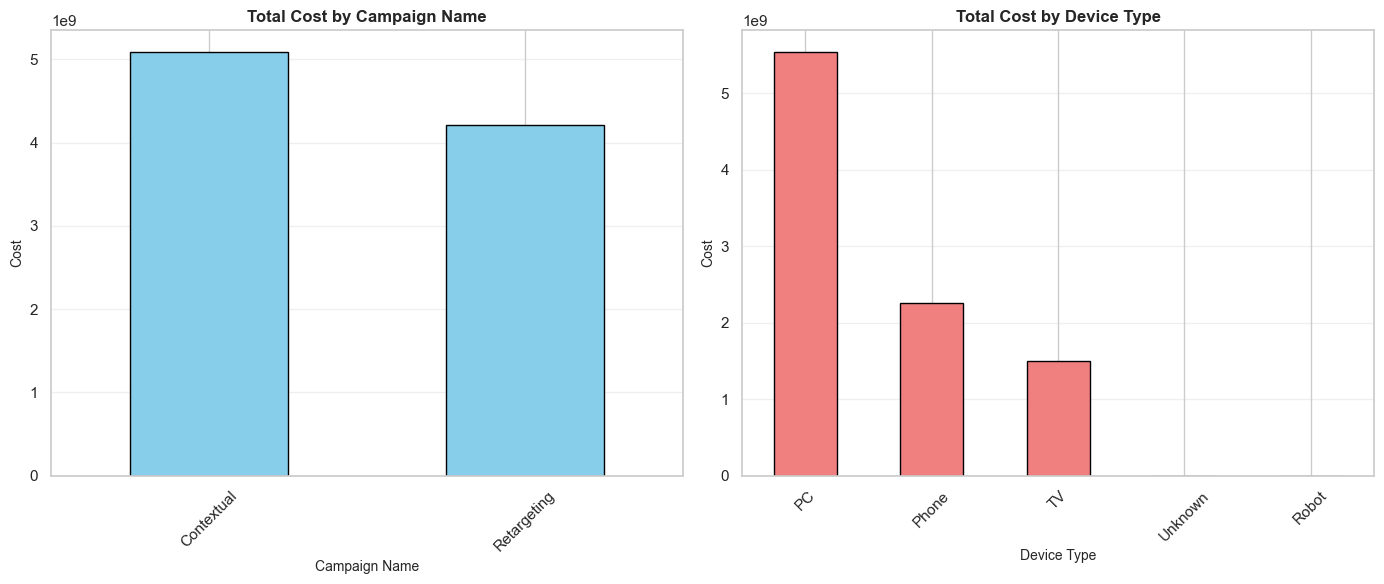

In [ ]:
# Total Cost by Campaign and Device Type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Cost distribution by campaign_name
cost_by_campaign = df_programmatic.groupby('campaign_name')['cost_milli_cent'].sum().sort_values(ascending=False)
cost_by_campaign.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Total Cost by Campaign Name', fontsize=12, fontweight='bold')
ax1.set_xlabel('Campaign Name', fontsize=10)
ax1.set_ylabel('Cost', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Cost distribution by device_type
cost_by_device = df_programmatic.groupby('device_type')['cost_milli_cent'].sum().sort_values(ascending=False)
cost_by_device.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Total Cost by Device Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Device Type', fontsize=10)
ax2.set_ylabel('Cost', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

AVERAGE COST BY CAMPAIGN NAME
campaign_name
Retargeting    1085.273460
Contextual      373.907072
Name: cost_milli_cent, dtype: float64

AVERAGE COST BY DEVICE TYPE
device_type
TV         1112.711187
Unknown     607.902041
PC          542.750228
Phone       379.904634
Robot       337.268667
Name: cost_milli_cent, dtype: float64


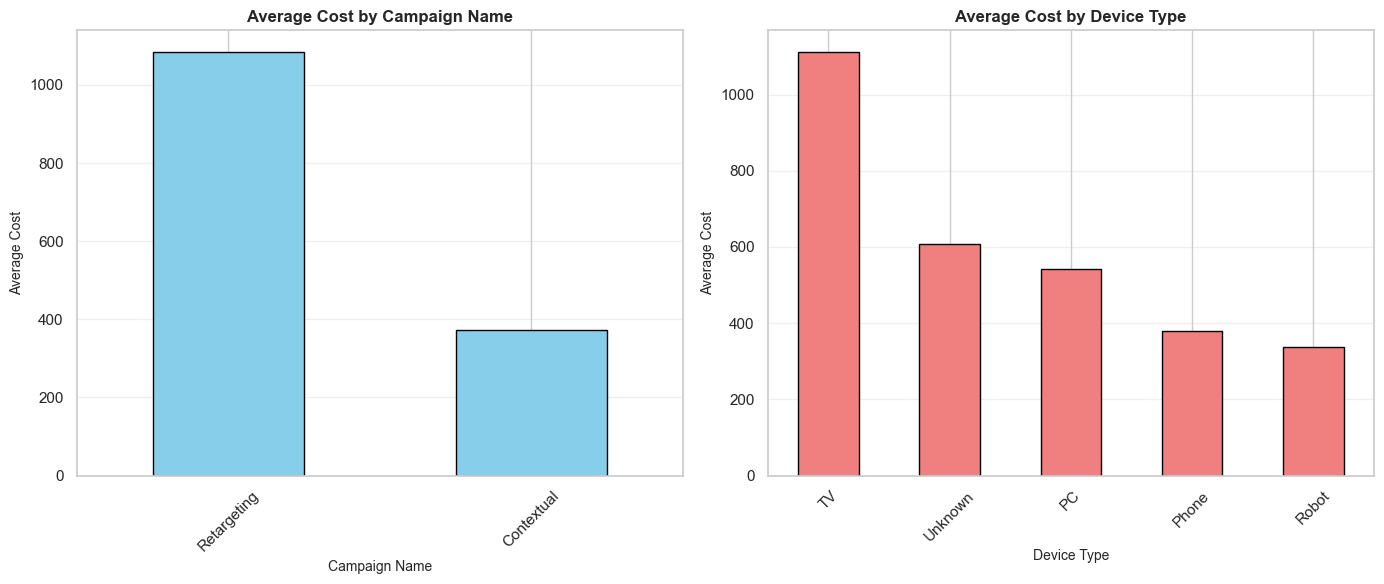

In [ ]:
# Average cost by campaign_name and device_type
print("=" * 60)
print("AVERAGE COST BY CAMPAIGN NAME")
print("=" * 60)
avg_cost_by_campaign = df_programmatic.groupby('campaign_name')['cost_milli_cent'].mean().sort_values(ascending=False)
print(avg_cost_by_campaign)

print("\n" + "=" * 60)
print("AVERAGE COST BY DEVICE TYPE")
print("=" * 60)
avg_cost_by_device = df_programmatic.groupby('device_type')['cost_milli_cent'].mean().sort_values(ascending=False)
print(avg_cost_by_device)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

avg_cost_by_campaign.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Average Cost by Campaign Name', fontsize=12, fontweight='bold')
ax1.set_xlabel('Campaign Name', fontsize=10)
ax1.set_ylabel('Average Cost', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

avg_cost_by_device.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Average Cost by Device Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Device Type', fontsize=10)
ax2.set_ylabel('Average Cost', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

TOTAL COST BY MONTH AND CAMPAIGN
campaign_name    Contextual   Retargeting
month                                    
2024-01        1.048037e+09  7.994531e+08
2024-02        9.411439e+08  9.544162e+08
2024-03        7.587229e+08  4.147162e+08
2024-04        7.190289e+08  6.407388e+08
2024-05        8.688360e+08  7.392494e+08
2024-06        7.563356e+08  6.566354e+08


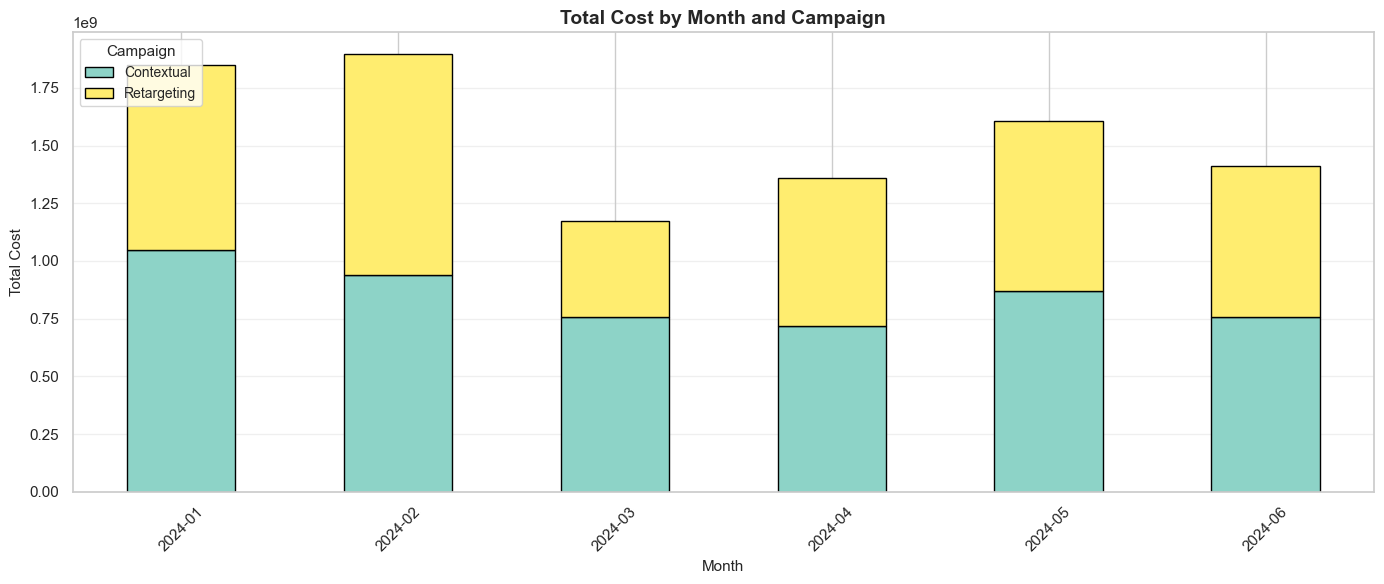

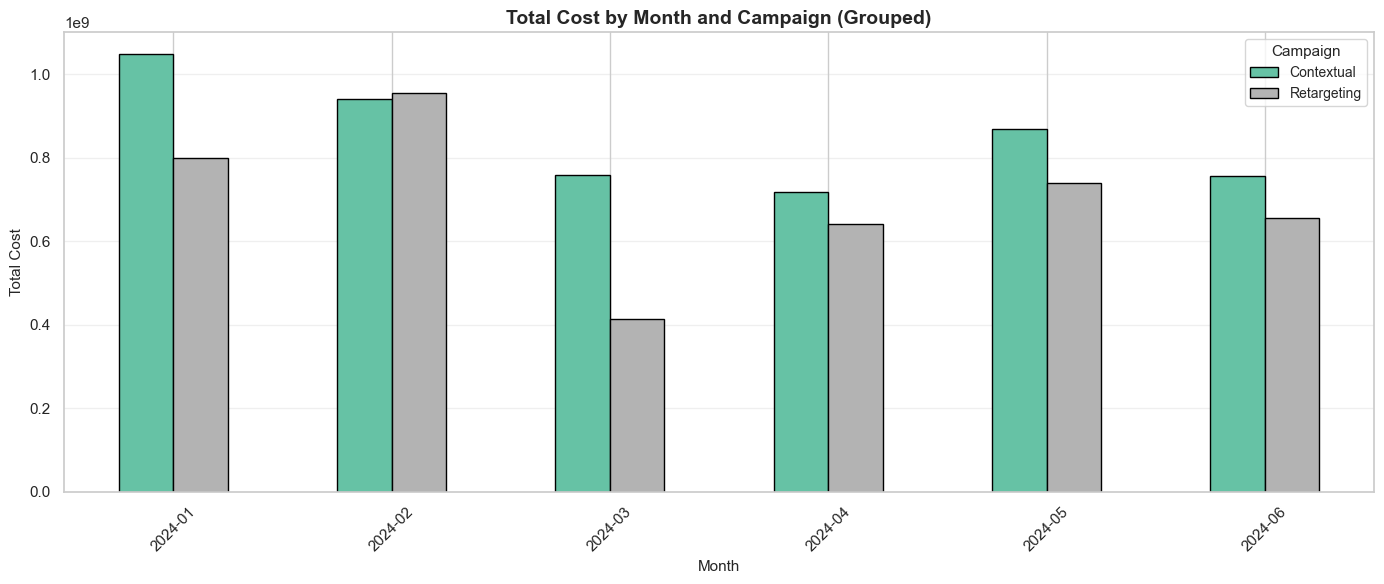

In [ ]:
# Total cost by month and campaign
print("=" * 80)
print("TOTAL COST BY MONTH AND CAMPAIGN")
print("=" * 80)
df_programmatic['date'] = pd.to_datetime(df_programmatic['timestamp_utc'])
df_programmatic['month'] = df_programmatic['date'].dt.to_period('M')

monthly_campaign_cost = df_programmatic.groupby(['month', 'campaign_name'])['cost_milli_cent'].sum().unstack(fill_value=0)
print(monthly_campaign_cost)

# Visualization - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_campaign_cost.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', edgecolor='black')

ax.set_title('Total Cost by Month and Campaign', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_campaign_cost.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')

ax.set_title('Total Cost by Month and Campaign (Grouped)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TOTAL COST BY MONTH AND DEVICE TYPE
device_type            PC         Phone     Robot            TV     Unknown
month                                                                      
2024-01      1.258198e+09  4.021446e+08  2488.442  1.871249e+08   20155.896
2024-02      1.256905e+09  4.282634e+08   330.897  2.103502e+08   41147.302
2024-03      6.369725e+08  4.062871e+08   914.228  1.301196e+08   58875.238
2024-04      8.214746e+08  3.820154e+08   313.657  1.562338e+08   43607.042
2024-05      9.301769e+08  3.721543e+08     0.000  3.056788e+08   75372.423
2024-06      6.410300e+08  2.615438e+08     0.000  5.102193e+08  177862.899


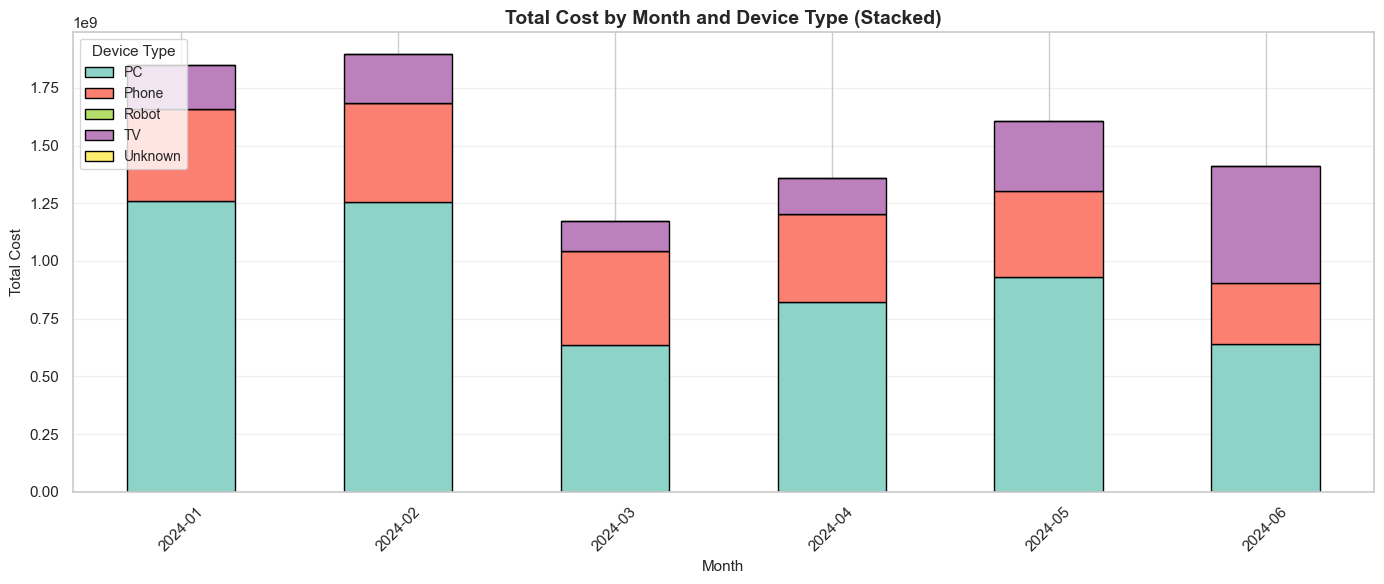

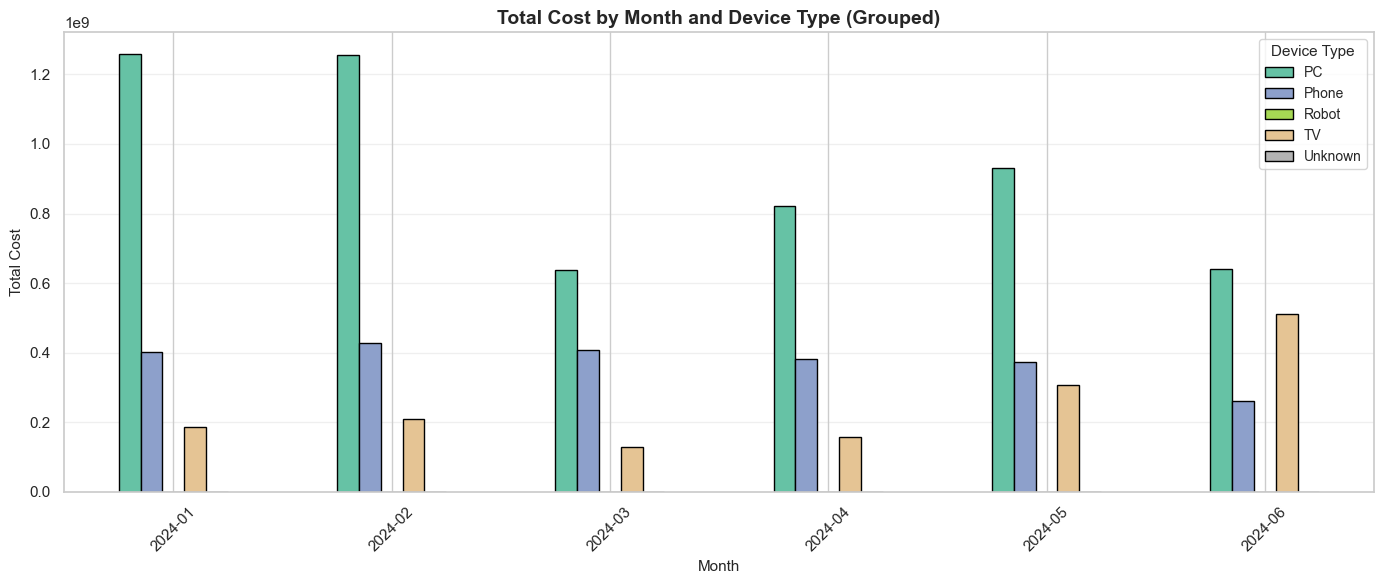

In [ ]:
# Total cost by month and device_type
print("=" * 80)
print("TOTAL COST BY MONTH AND DEVICE TYPE")
print("=" * 80)

monthly_device_cost = df_programmatic.groupby(['month', 'device_type'])['cost_milli_cent'].sum().unstack(fill_value=0)
print(monthly_device_cost)

# Visualization - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_device_cost.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', edgecolor='black')

ax.set_title('Total Cost by Month and Device Type (Stacked)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Device Type', fontsize=10, title_fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 6))

monthly_device_cost.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')

ax.set_title('Total Cost by Month and Device Type (Grouped)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Device Type', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The programmatic data shows that **Contextual campaigns account for most of the total spend**, while **Retargeting campaigns represent a smaller share but with higher average costs**. Spending is mainly driven by **PC devices**, followed by **mobile**, whereas **TV generates fewer events but higher average costs**. Over time, monthly spending varies, but the **overall allocation by campaign type and device remains stable** across the period.


### <span style="color:#1f77b4"><b>Tv_publisher Dataset: Data Cleaning and Descriptive Statistics </b></span> 

In [ ]:
df_tv = pd.read_csv('data/tv_publisher.csv')
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827133 entries, 0 to 5827132
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   device_id        object 
 1   timestamp_utc    object 
 2   cost_milli_cent  float64
dtypes: float64(1), object(2)
memory usage: 133.4+ MB


In [ ]:
df_tv.head()

,device_id,timestamp_utc,cost_milli_cent
0,ctv81YlbBXho,2024-04-23 21:09:46,2325.51
1,ctvWr7bOO5Je,2024-04-19 18:31:30,2325.51
2,ctvktBqDUgcV,2024-05-07 23:32:37,2325.51
3,ctv4bFFpBJms,2024-06-28 00:10:10,2325.51
4,ctvFZB9pUMZ7,2024-05-24 03:45:45,2325.51


In [ ]:
df_tv['timestamp_utc'] = pd.to_datetime(df_tv['timestamp_utc'])
df_tv['date'] = df_tv['timestamp_utc'].dt.date

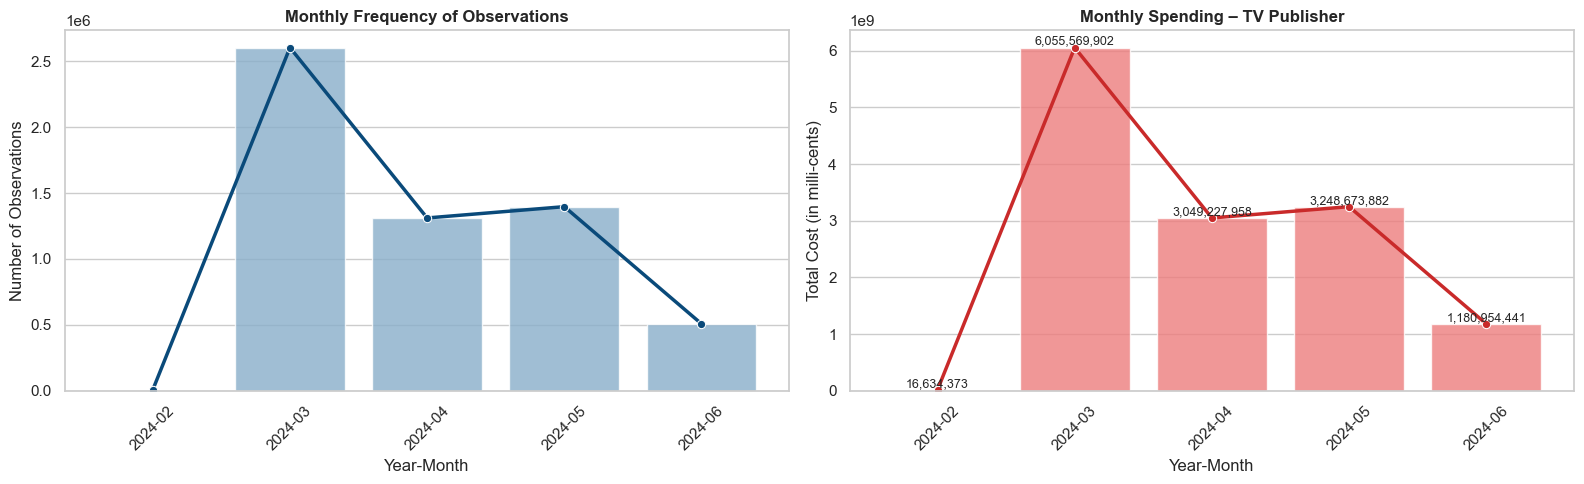

In [ ]:
sns.set_theme(style="whitegrid")

# Create year_month column
df_tv['year_month'] = df_tv['timestamp_utc'].dt.to_period('M')

# --- Monthly frequency of observations ---
monthly_frequency = (
    df_tv
    .groupby('year_month')
    .size()
    .reset_index(name='count')
)
monthly_frequency['year_month'] = monthly_frequency['year_month'].astype(str)

# --- Monthly spending ---
monthly_spending = (
    df_tv
    .groupby('year_month')['cost_milli_cent']
    .sum()
    .reset_index(name='total_cost')
)
monthly_spending['year_month'] = monthly_spending['year_month'].astype(str)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# -------- Frequency plot --------
sns.barplot(
    data=monthly_frequency,
    x='year_month',
    y='count',
    color="#7EB0D5",
    alpha=0.8,
    ax=axes[0]
)
sns.lineplot(
    data=monthly_frequency,
    x='year_month',
    y='count',
    color="#0A4A7A",
    marker='o',
    linewidth=2.5,
    ax=axes[0]
)

axes[0].set_title("Monthly Frequency of Observations", weight="bold")
axes[0].set_xlabel("Year-Month")
axes[0].set_ylabel("Number of Observations")
axes[0].tick_params(axis='x', rotation=45)

# -------- Spending plot --------
sns.barplot(
    data=monthly_spending,
    x='year_month',
    y='total_cost',
    color="#FF6B6B",
    alpha=0.8,
    ax=axes[1]
)
sns.lineplot(
    data=monthly_spending,
    x='year_month',
    y='total_cost',
    color="#C92A2A",
    marker='o',
    linewidth=2.5,
    ax=axes[1]
)

axes[1].set_title("Monthly Spending – TV Publisher", weight="bold")
axes[1].set_xlabel("Year-Month")
axes[1].set_ylabel("Total Cost (in milli-cents)")
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on spending bars
for i, v in enumerate(monthly_spending['total_cost']):
    axes[1].text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


The monthly frequency and spending for the TV publisher show a strong peak in March, where both the number of observations and total cost reach their highest levels. After March, activity and spending decline, with moderate levels in April and May and a sharper decrease in June. The parallel movement of frequency and spending suggests that higher costs are mainly driven by increased activity rather than changes in unit costs over time.
